# # # Neural Network Implementation in Numpy

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Developing a 5 layer feed forward neural network
Having a 2D input and 1D output using ReLu and Sigmoid activation function

In [ ]:
'''

Here is the structure of neural network
we are converting our data from 2 dimension to 25 dimension to 50 dimension and then retriving back the result in 1 D 
'''
NN_ARCHITECTURE = 

In [ ]:
'''

Intializing the parameters(weights and bias) of all the layers of the network

How this function works?

For each layer in neural network we find the input and output dimesion

if we want to find number of parameters for layer 1 where we input an array of 1000*2
and want 1000*25 as output
W: (2*25)
B: (25)
'''




def init_layers(nn_architecture, seed = 99):
    # random seed initiation
    np.random.seed(seed)
    # number of layers in our neural network
    number_of_layers = len(nn_architecture)
    # parameters storage initiation
    params_values = {}
    
    # iteration over network layers
    for idx, layer in enumerate(nn_architecture):
        # we number network layers from 1
        layer_idx = 
        
        # extracting the number of units in layers
        layer_input_size = 
        layer_output_size = 

        # initiating the values of the W matrix
        # and vector b for subsequent layers
        params_values
        params_values
        
    return params_values

In [ ]:
'defining sigmoid, relu functions and their updation rule'
def sigmoid(Z):
    return 1/(1+np.exp(-Z))
    
# relu activation function for the hidden layers of the network
def relu(Z):
    return np.maximum(0,Z)

# gradient calculation of simgmoid activations
def sigmoid_backward(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)
# gradient calculations of relu activations
def relu_backward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0;
    return dZ;

In [ ]:
'''
Defining a single layer perceptron
having parameters as

Input
W
B
activation

'''
def single_layer_forward_propagation(A_prev, W_curr, b_curr, activation="relu"):
    # calculation of the input value for the activation function
    Z_curr = np.dot(W_curr, A_prev) + b_curr
    
    # selection of activation function
    if activation is "relu":
        activation_func = relu
    elif activation is "sigmoid":
        activation_func = sigmoid
    else:
        raise Exception('Non-supported activation function')
        
    # return of calculated activation A and the intermediate Z matrix
    return activation_func(Z_curr), Z_curr

In [ ]:
'''
Defining function for forward propogation

'''


def full_forward_propagation(X, params_values, nn_architecture):
    # creating a temporary memory to store the information needed for a backward step
    memory = {}
    # X vector is the activation for layer 0 
    A_curr = X
    
    # iteration over network layers
    for idx, layer in enumerate(nn_architecture):
        # we number network layers from 1
        layer_idx = idx + 1
        # transfer the activation from the previous iteration
        A_prev = A_curr
        
        # extraction of the activation function for the current layer
        activ_function_curr = 
        # extraction of W for the current layer
        W_curr = params_values
        # extraction of b for the current layer
        b_curr = params_values
        # calculation of activation for the current layer
        A_curr, Z_curr = 
        
        # saving calculated values in the memory
        memory["A" + str(idx)] = 
        memory["Z" + str(layer_idx)] = 
       
    # return of prediction vector and a dictionary containing intermediate values
    return A_curr, memory

In [ ]:
'''
 Computing cost after 1 step of forward propagation
'''

def get_cost_value(Y_hat, Y):
    # number of examples
    m = Y_hat.shape[1]
    # calculation of the cost according to the formula
    cost = 
    return np.squeeze(cost)

In [ ]:
'''
to convert the probabilies(output of sigmoid function) into class values
'''


def convert_prob_into_class(probs):
    probs_ = np.copy(probs)
    probs_[] = 1
    probs_[] = 0
    return probs_

In [ ]:
'''
to convert the probabilies(output of sigmoid function) into class values
'''

def get_accuracy_value(Y_hat, Y):
    Y_hat_ = 
    return 

In [ ]:

'''
single step of backward propagation for a single layer

'''
def single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, A_prev, activation="relu"):
    # number of examples
    m = A_prev.shape[1]
    
    # selection of activation function
    if activation is "relu":
        backward_activation_func = 
    elif activation is "sigmoid":
        backward_activation_func = 
    else:
        raise Exception('Non-supported activation function')
    
    # calculation of the activation function derivative
    dZ_curr = 
    
    # derivative of the matrix W
    dW_curr = 
    # derivative of the vector b
    db_curr = 
    # derivative of the matrix A_prev
    dA_prev = 

    return dA_prev, dW_curr, db_curr

In [ ]:

'''
1 complete step of backward propagation using the above function

'''

def full_backward_propagation(Y_hat, Y, memory, params_values, nn_architecture):
    grads_values = {}
    
    # number of examples
    m = Y.shape[1]
    # a hack ensuring the same shape of the prediction vector and labels vector
    Y = Y.reshape(Y_hat.shape)
    
    # initiation of gradient descent algorithm
    dA_prev = 
    
    for layer_idx_prev, layer in 
        # we number network layers from 1
        layer_idx_curr = 
        # extraction of the activation function for the current layer
        activ_function_curr = 
        
        dA_curr = dA_prev
        
        A_prev = 
        Z_curr = 
        
        W_curr = 
        b_curr = 
        
        dA_prev, dW_curr, db_curr = 
        
        grads_values[] = 
        grads_values[] = 
    
    return grads_values

In [ ]:
'''
to update the parameters(Weights) using the gradients from back propagation
'''


def update(params_values, grads_values, nn_architecture, learning_rate):

    # iteration over network layers
    for layer_idx, layer in enumerate(nn_architecture, 1):
        params_values[] -= learning_rate * grads_values[]        
        params_values[] -= learning_rate * grads_values[]

    return params_values;

In [ ]:
'''
Training the Neural Network

'''

def train(X, Y, nn_architecture, epochs, learning_rate, verbose=False, callback=None):
    # initiation of neural net parameters
    params_values = 
    # initiation of lists storing the history 
    # of metrics calculated during the learning process 
    cost_history = []
    accuracy_history = []
    
    # performing calculations for subsequent iterations
    for i in range(epochs):
        # step forward
        Y_hat, cashe = 
        
        # calculating metrics and saving them in history
        cost = get_cost_value(Y_hat, Y)
        cost_history.append(cost)
        accuracy = get_accuracy_value(Y_hat, Y)
        accuracy_history.append(accuracy)
        
        # step backward - calculating gradient
        grads_values = 
        # updating model state
        params_values = 
        
        if(i % 50 == 0):
            if(verbose):
                print("Iteration: {:05} - cost: {:.5f} - accuracy: {:.5f}".format(i, cost, accuracy))
            if(callback is not None):
                callback(i, params_values)
            
    return params_values

In [ ]:
N_SAMPLES = 1000
# ratio between training and test sets
TEST_SIZE = 0.1

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

In [ ]:

def make_plot(X, y, plot_name, file_name=None, XX=None, YY=None, preds=None, dark=False):
    if (dark):
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    plt.figure(figsize=(16,12))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 1, cmap=cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    if(file_name):
        plt.savefig(file_name)
        plt.close()

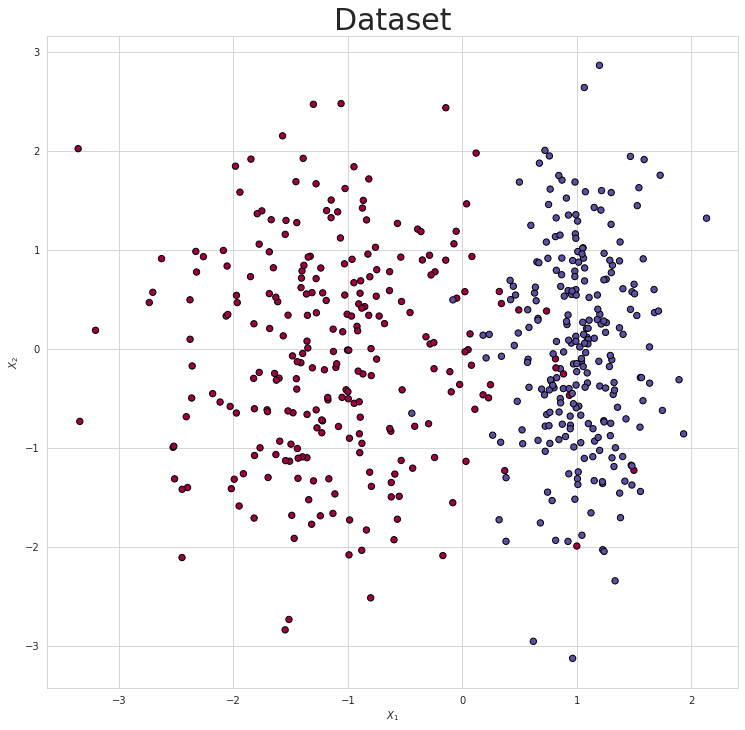

In [ ]:
make_plot(X, y, "Dataset")

In [ ]:
params_values = train(np.transpose(X_train), np.transpose(y_train.reshape((y_train.shape[0], 1))), NN_ARCHITECTURE, 10000, 0.01)

In [ ]:
Y_test_hat, _ = full_forward_propagation(np.transpose(X_test), params_values, NN_ARCHITECTURE)

In [ ]:
acc_test = get_accuracy_value(Y_test_hat, np.transpose(y_test.reshape((y_test.shape[0], 1))))
print("Test set accuracy: {:.2f} -Increased in comparision to Logistic regression".format(acc_test))